Use Iris flower dataset and perform following :
1. Create a box plot for each feature in the dataset.
2. Identify and discuss distributions and identify outliers from them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Set a nice style for the plots
plt.style.use('ggplot')

In [2]:
# Load the dataset
df = pd.read_csv('IRIS.csv')

# Display first few rows to ensure data is loaded correctly
print("Data Sample:")
print(df.head())

Data Sample:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


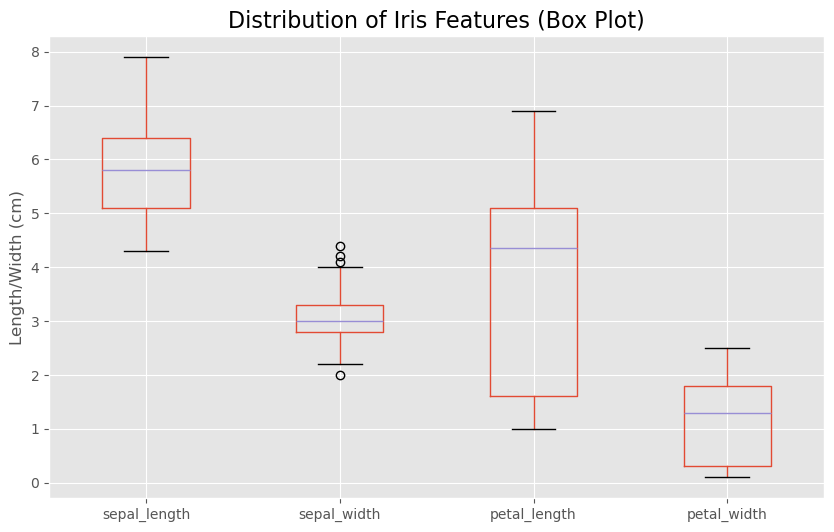

In [3]:
# Select only numeric columns for the box plot
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Create the plot
plt.figure(figsize=(10, 6))
df.boxplot(column=numeric_cols)

# Add titles and labels
plt.title('Distribution of Iris Features (Box Plot)', fontsize=16)
plt.ylabel('Length/Width (cm)', fontsize=12)
plt.grid(True) # Add grid lines for easier reading

# Show the plot
plt.show()

In [4]:
# Function to detect outliers using the Interquartile Range (IQR) method
print("--- Outlier Analysis ---")

for col in numeric_cols:
    # 1. Calculate Quartiles
    Q1 = df[col].quantile(0.25) # 25th percentile
    Q3 = df[col].quantile(0.75) # 75th percentile
    IQR = Q3 - Q1               # Interquartile Range
    
    # 2. Define Bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 3. Find values outside these bounds
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    # 4. Print Results
    print(f"\nFeature: {col}")
    if not outliers.empty:
        print(f"  Number of Outliers: {len(outliers)}")
        print(f"  Outlier Values: {outliers.values}")
    else:
        print("  No outliers detected.")

--- Outlier Analysis ---

Feature: sepal_length
  No outliers detected.

Feature: sepal_width
  Number of Outliers: 4
  Outlier Values: [4.4 4.1 4.2 2. ]

Feature: petal_length
  No outliers detected.

Feature: petal_width
  No outliers detected.
